Ingrid Izaguirre

UNI: ii2182

Research Computing in Earth Science 

Final Project

Figure list:

1. Textile figure: (by column) Dissolved Barium concentraion by depth across the longitude of the transect, CTD Salinity measurements by depth across the longitude of the transect, Correlation between Dissolved Barium concentration and CTD Salinity, colored by depth 
2. Barium and Alkalinity by Depth (left two columns), Barium and Alkalinity Correlation (far right)
3. Global Barium & Salinity Cartopy plots 
4. Correlation between Salinity & Barium by basin
5. Cartopy distribution maps of Salinity / Barium values + correlation between salinity and barium (N. Atl) 
6. Cartopy distribution maps of Salinity / Barium / Alkalinity values + correlation between barium, salinity, and alkalinity (S. Atl / Pacific) 

In [1]:
import pandas as pd
import xarray as xr
import cartopy 
import cartopy.crs as ccrs
import numpy as np 
from matplotlib import pyplot as plt 
from statsmodels.graphics.gofplots import qqplot
import math
import matplotlib.patches as mpatches
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

Downloading the GEOTRACES trace element dataset. Data obtained through CTD deployments during research cruises along select transects of the Atlantic and Pacific

In [2]:
# ! wget https://ndownloader.figshare.com/files/19804955?private_link=bff2bc90bc79f5bff9fe




Open the Dataset 

In [3]:
trace_data = xr.open_dataset('19804955?private_link=bff2bc90bc79f5bff9fe')
#print(trace_data)

Find the variable associated with cruise transect

In [4]:
trace_data.metavar1

<xarray.DataArray 'metavar1' (N_STATIONS: 1866)>
array([b'GA01', b'GA01', b'GA01', ..., b'GPpr07', b'GPpr07', b'GPpr10'],
      dtype=object)
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:  Cruise

Subset the data so that it only includes latitude, longitude, barium, salinity, temperature, depth, pressure, and cruise transect name 

In [5]:
vars = ['latitude', 'longitude', 'var8', 'var69', 'var1', 'var2', 'var7', 'metavar1']
vars

['latitude', 'longitude', 'var8', 'var69', 'var1', 'var2', 'var7', 'metavar1']

In [6]:
myds = trace_data[vars]
myds

<xarray.Dataset>
Dimensions:    (N_SAMPLES: 698, N_STATIONS: 1866)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    latitude   (N_STATIONS) float32 ...
    longitude  (N_STATIONS) float32 ...
    var8       (N_STATIONS, N_SAMPLES) float32 ...
    var69      (N_STATIONS, N_SAMPLES) float32 ...
    var1       (N_STATIONS, N_SAMPLES) float32 ...
    var2       (N_STATIONS, N_SAMPLES) float32 ...
    var7       (N_STATIONS, N_SAMPLES) float32 ...
    metavar1   (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr07' b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:22
    DataField:           GeneralField
    DataType:            GeneralType

Rename the variables with their long names from original dataset 

In [7]:
rename_dict = {vname: myds[vname].long_name for vname in myds.data_vars}
rename_dict

{'latitude': 'Latitude',
 'longitude': 'Longitude',
 'var8': 'CTDSAL',
 'var69': 'Ba_D_CONC_BOTTLE',
 'var1': 'PRESSURE',
 'var2': 'DEPTH',
 'var7': 'CTDTMP',
 'metavar1': 'Cruise'}

In [8]:
ds = myds.rename(rename_dict)
ds

<xarray.Dataset>
Dimensions:           (N_SAMPLES: 698, N_STATIONS: 1866)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    Latitude          (N_STATIONS) float32 ...
    Longitude         (N_STATIONS) float32 ...
    CTDSAL            (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE          (N_STATIONS, N_SAMPLES) float32 ...
    DEPTH             (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP            (N_STATIONS, N_SAMPLES) float32 ...
    Cruise            (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:22
    DataField:           Gen

Change data variables Latitude, Longitude, and Depth to coordinates of the Dataset

In [9]:
ds_cruise = ds.set_coords(['Longitude', 'Latitude', 'DEPTH'])
ds_cruise

<xarray.Dataset>
Dimensions:           (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
    Latitude          (N_STATIONS) float32 ...
    Longitude         (N_STATIONS) float32 ...
    DEPTH             (N_STATIONS, N_SAMPLES) float32 ...
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    CTDSAL            (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE          (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP            (N_STATIONS, N_SAMPLES) float32 ...
    Cruise            (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:22
    DataField: 

Broadcast data so that arrays have compatible shape 

In [10]:
lon_2d, depth = xr.broadcast_arrays(ds_cruise.Longitude, ds_cruise.DEPTH)
ds_cruise.coords['lon_2d'] = lon_2d
ds_cruise

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: xarray.broadcast_arrays is deprecated: use xarray.broadcast instead
  """Entry point for launching an IPython kernel.


<xarray.Dataset>
Dimensions:           (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
    Latitude          (N_STATIONS) float32 ...
    Longitude         (N_STATIONS) float32 ...
    DEPTH             (N_STATIONS, N_SAMPLES) float32 ...
    lon_2d            (N_STATIONS, N_SAMPLES) float32 349.3 349.3 ... 179.403
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    CTDSAL            (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE          (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP            (N_STATIONS, N_SAMPLES) float32 ...
    Cruise            (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOT

Convert the xarray Dataset to a pandas Dataframe

In [11]:
df = ds_cruise.to_dataframe()
df.head()

Latitude   Longitude     CTDSAL  Ba_D_CONC_BOTTLE  \
N_SAMPLES N_STATIONS                                                       
0         0           38.432899  349.299988  34.951000               NaN   
          1           40.333199  349.964111  35.146000               NaN   
          2           40.333099  350.540497  34.948002               NaN   
          3           40.332901  350.356812  34.959000               NaN   
          4           40.333302  350.233398  35.137001               NaN   

                         PRESSURE        DEPTH     CTDTMP   Cruise      lon_2d  
N_SAMPLES N_STATIONS                                                            
0         0           3000.699951  2957.100098   2.840000  b'GA01'  349.299988  
          1              3.000000     3.000000  16.924000  b'GA01'  349.964111  
          2              6.000000     6.000000  16.882999  b'GA01'  350.540497  
          3              3.000000     3.000000  16.750999  b'GA01'  350.356812  
          4              8.100000     8.000000  16.348000  b'GA01'  350.233398

Remove NaN values from the dataset

In [12]:
df_drop = df.dropna()
df_drop

Latitude   Longitude     CTDSAL  Ba_D_CONC_BOTTLE  \
N_SAMPLES N_STATIONS                                                       
0         228        -46.919998  312.800415  34.620998         46.987316   
          230        -44.706799  314.463898  34.554001         37.801952   
          231        -42.371300  315.974213  34.527000         41.496586   
          236        -35.008801  320.563202  35.730000         45.282928   
          238        -32.089401  322.540710  35.966999         40.856586   
          241        -29.057899  324.204010  35.699001         38.107319   
          246        -17.016800  329.400787  37.437000         41.304390   
          250         -9.154150  332.000000  36.681999         44.672195   
          252         -5.677000  331.539886  36.282001         42.398048   
          257         -0.187150  327.121887  35.706001         41.297562   
          751        -40.005402    0.868650  34.535000         42.536587   
          798        -36.465801   13.270400  34.875999         41.951221   
          1043       -33.959999   17.521000  35.139999         41.034145   
          1046       -33.994999   16.952999  35.365002         32.614635   
          1047       -34.013000   16.587999  35.377998         37.219513   
          1050       -34.091999   15.164000  35.532001         37.482925   
          1051       -34.124001   14.583000  35.626999         37.258537   
          1052       -34.426800   14.406800  35.625999         37.746342   
          1053       -34.723999   14.224000  35.639999         35.629269   
          1054       -35.027000   14.050000  35.488998         38.985367   
          1056       -35.625999   13.683000  35.521000         38.634148   
          1057       -35.923000   13.502000  34.929001         40.829269   
          1058       -36.217999   13.313000  35.630001         37.102440   
          1061       -37.118000   12.739000  35.549999         38.087807   
          1066       -38.827000   11.575000  34.612000         42.546341   
          1070       -40.291000   10.551000  35.112999         40.487804   
          1077       -43.325001    8.236000  35.050999         41.648781   
          1082       -44.889500    6.884000  33.907001         47.365852   
          1085       -46.021400    5.864670  33.747002         59.541466   
          1092       -48.701000    3.178000  33.762001         58.917072   
...                         ...         ...        ...               ...   
203       1736       -10.500500  208.000000  34.685001        118.500000   
204       1711       -11.999900  265.999512  34.678001        136.800003   
205       324         31.750099  295.830505  34.877998         69.000000   
          1701       -12.005000  280.804291  34.685001        121.400002   
208       1718       -14.983200  247.250000  34.667000        129.300003   
209       1701       -12.005000  280.804291  34.685001        122.099998   
          1726       -11.670600  231.998993  34.680000        129.100006   
          1736       -10.500500  208.000000  34.691002        109.800003   
210       324         31.750099  295.830505  34.876999         66.599998   
          1718       -14.983200  247.250000  34.667000        126.699997   
211       1711       -11.999900  265.999512  34.678001        137.899994   
213       1718       -14.983200  247.250000  34.667000        124.800003   
214       1711       -11.999900  265.999512  34.678001        138.600006   
215       1726       -11.670600  231.998993  34.680000        127.300003   
          1736       -10.500500  208.000000  34.693001        108.800003   
216       324         31.750099  295.830505  34.876999         66.900002   
          1701       -12.005000  280.804291  34.685001        125.300003   
218       1736       -10.500500  208.000000  34.694000        107.199997   
219       1718       -14.983200  247.250000  34.667000        123.599998   
220       1718       -14.983200  247.250000  34.667000        130.89999

Use the pandas groupby function to split the data by cruise transect 

In [13]:
trans = df_drop.groupby('Cruise')


# Loop through each transect and create 3 plots per cruise transect 
(transect names are listed above each plot)

1. Dissolved Barium concentraion by depth across the longitude of the transect 
2. CTD Salinity measurements by depth across the longitude of the transect
3. Correlation between Dissolved Barium concentration and CTD Salinity, colored by depth 

# For reference, these are the GEOTRACES transects from the GEOTRACES website:
https://www.egeotraces.org/?group=Dissolved%20Trace%20Elements,variable=Ba%20dissolved

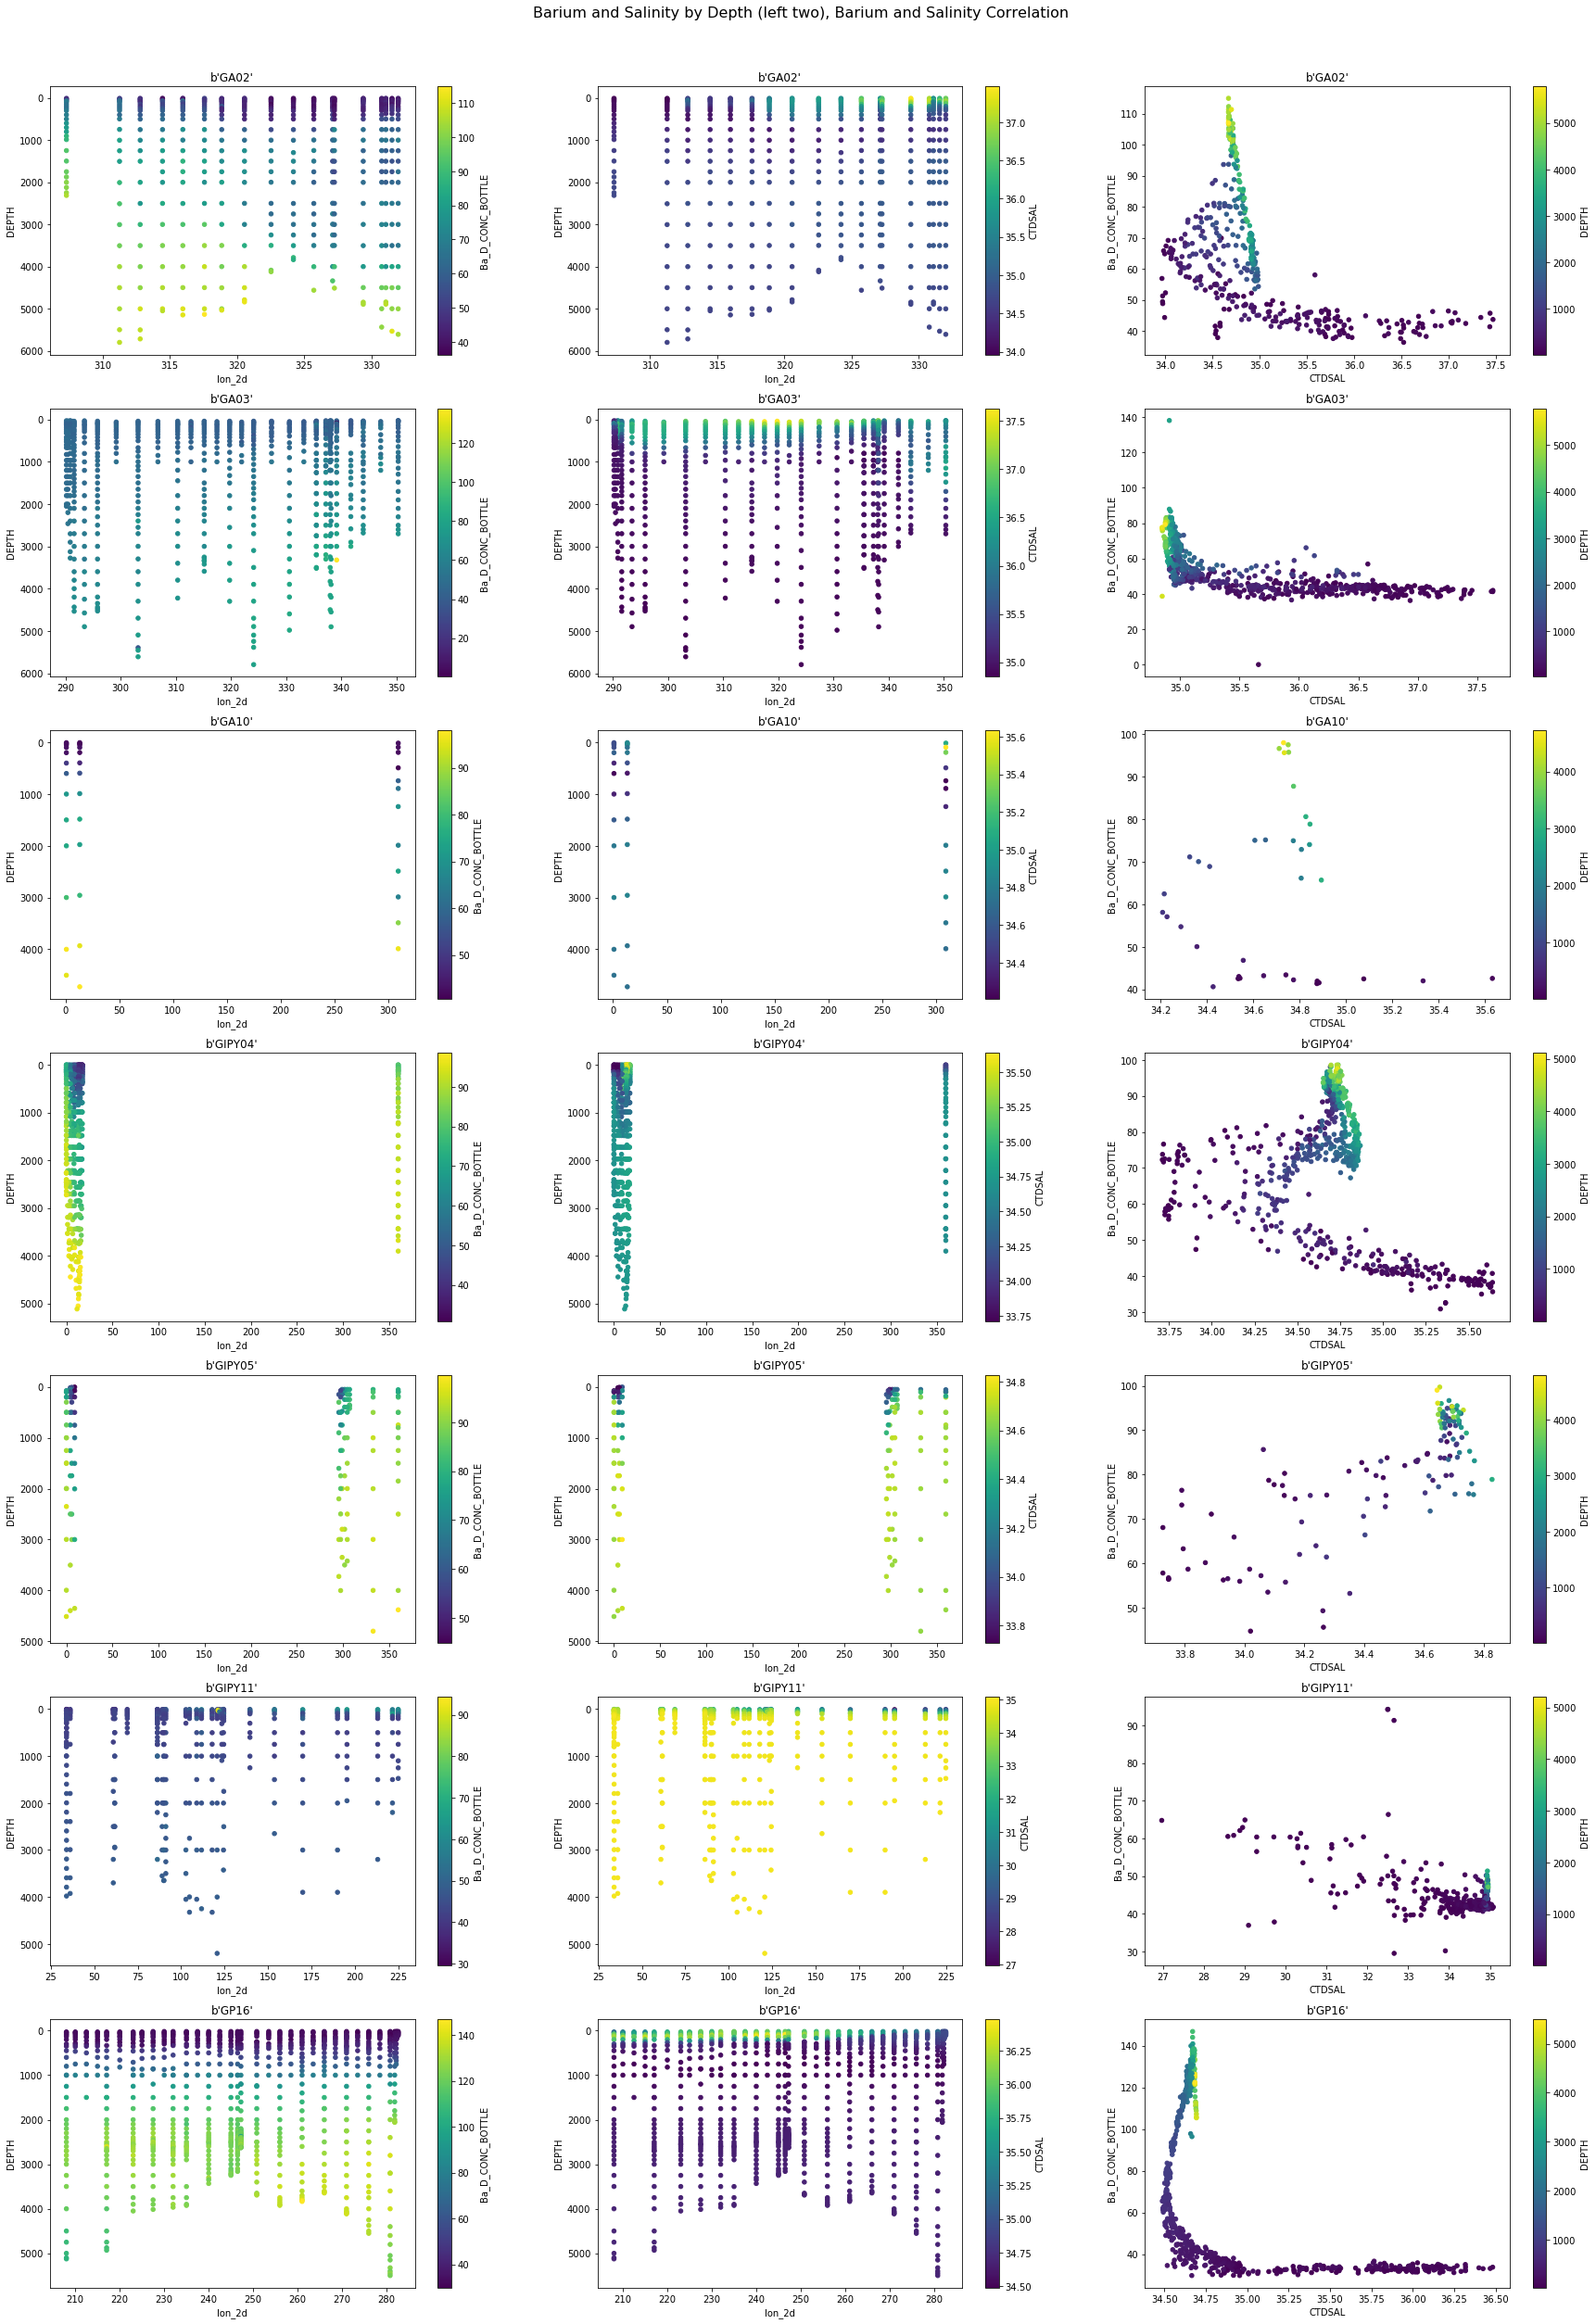

In [14]:
fig, ax = plt.subplots(figsize = (30,40), ncols= 3, nrows= len(trans.Cruise))


fig.suptitle('Barium and Salinity by Depth (left two), Barium and Salinity Correlation', size = 16)
fig.subplots_adjust(top=0.95)

i = 0

for transect, line in trans:
    line.plot.scatter(y='DEPTH', x='lon_2d', c='Ba_D_CONC_BOTTLE', cmap='viridis', title = transect, sharex=False, ax=ax[i,0])
    ax[i,0].invert_yaxis()
    line.plot.scatter(y='DEPTH', x='lon_2d', c='CTDSAL', cmap='viridis', title = transect, sharex=False, ax=ax[i,1])
    ax[i,1].invert_yaxis()
    line.plot.scatter(x='CTDSAL', y='Ba_D_CONC_BOTTLE', cmap='viridis', c='DEPTH', title = transect, sharex=False, ax=ax[i,2])
    i += 1

From these plots we can observe that (as is expected) Barium is depleted at the surface and regenerates at depth. The vertical gradient of Ba changes according to the basin  as seen by looking at various transects and their corresponding longitude.

However, the trends observed in Barium do not match those of Salinity not are the two positively correlated (except for perhaps in GIPY05). In some transects (GIPY11) they appear to be negatively correlated. 

Next, let's look how Total Alkalinity compares with Barium trends in the ocean...

Create a new xr dataset replacing CTD Salinity with Total Alkalinity 

In [15]:
var = ['latitude', 'longitude', 'var30', 'var69', 'var1', 'var2', 'var7', 'metavar1']
var

['latitude', 'longitude', 'var30', 'var69', 'var1', 'var2', 'var7', 'metavar1']

Repeat all steps above to rename, set coords, and broadcast the dataset before moving it to a pandas dataframe, dropping all NaN values and grouping the data by transects with Alkalinity data

In [16]:
alkds = trace_data[var]
alkds

<xarray.Dataset>
Dimensions:    (N_SAMPLES: 698, N_STATIONS: 1866)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    latitude   (N_STATIONS) float32 ...
    longitude  (N_STATIONS) float32 ...
    var30      (N_STATIONS, N_SAMPLES) float32 ...
    var69      (N_STATIONS, N_SAMPLES) float32 ...
    var1       (N_STATIONS, N_SAMPLES) float32 ...
    var2       (N_STATIONS, N_SAMPLES) float32 ...
    var7       (N_STATIONS, N_SAMPLES) float32 ...
    metavar1   (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr07' b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:22
    DataField:           GeneralField
    DataType:            GeneralType

In [17]:
renamedict = {vname: alkds[vname].long_name for vname in alkds.data_vars}
renamedict

{'latitude': 'Latitude',
 'longitude': 'Longitude',
 'var30': 'TALK_D_CONC_BOTTLE',
 'var69': 'Ba_D_CONC_BOTTLE',
 'var1': 'PRESSURE',
 'var2': 'DEPTH',
 'var7': 'CTDTMP',
 'metavar1': 'Cruise'}

In [18]:
alk_ds = alkds.rename(renamedict)
alk_ds

<xarray.Dataset>
Dimensions:             (N_SAMPLES: 698, N_STATIONS: 1866)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    Latitude            (N_STATIONS) float32 ...
    Longitude           (N_STATIONS) float32 ...
    TALK_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE    (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE            (N_STATIONS, N_SAMPLES) float32 ...
    DEPTH               (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP              (N_STATIONS, N_SAMPLES) float32 ...
    Cruise              (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:22
    DataFi

In [19]:
cruise = alk_ds.set_coords(['Longitude', 'Latitude', 'DEPTH'])
cruise

<xarray.Dataset>
Dimensions:             (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
    Latitude            (N_STATIONS) float32 ...
    Longitude           (N_STATIONS) float32 ...
    DEPTH               (N_STATIONS, N_SAMPLES) float32 ...
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    TALK_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE    (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE            (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP              (N_STATIONS, N_SAMPLES) float32 ...
    Cruise              (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP2017/digital_data/GEOTRACES_IDP2017_...
    SourceLastModified:  2018-02-05T20:34:

In [20]:
lon2d, depth = xr.broadcast_arrays(cruise.Longitude, cruise.DEPTH)
cruise.coords['lon2d'] = lon2d
cruise

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: xarray.broadcast_arrays is deprecated: use xarray.broadcast instead
  """Entry point for launching an IPython kernel.


<xarray.Dataset>
Dimensions:             (N_SAMPLES: 698, N_STATIONS: 1866)
Coordinates:
    Latitude            (N_STATIONS) float32 ...
    Longitude           (N_STATIONS) float32 ...
    DEPTH               (N_STATIONS, N_SAMPLES) float32 ...
    lon2d               (N_STATIONS, N_SAMPLES) float32 349.3 349.3 ... 179.403
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    TALK_D_CONC_BOTTLE  (N_STATIONS, N_SAMPLES) float32 ...
    Ba_D_CONC_BOTTLE    (N_STATIONS, N_SAMPLES) float32 ...
    PRESSURE            (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP              (N_STATIONS, N_SAMPLES) float32 ...
    Cruise              (N_STATIONS) object b'GA01' b'GA01' ... b'GPpr10'
Attributes:
    Conventions:         ODV NetCDF Export File
    Version:             V1.0
    Creator:             rschlitz@BGEO04P020
    CreateTime:          2018-02-11T10:14:37
    Software:            Ocean Data View 5.0.0 - 64 bit (Windows)
    Source:              C:/GEOTRACES/IDP20

In [21]:
alk_df = cruise.to_dataframe()
alk_df.head()

Latitude   Longitude  TALK_D_CONC_BOTTLE  \
N_SAMPLES N_STATIONS                                              
0         0           38.432899  349.299988                 NaN   
          1           40.333199  349.964111                 NaN   
          2           40.333099  350.540497                 NaN   
          3           40.332901  350.356812                 NaN   
          4           40.333302  350.233398                 NaN   

                      Ba_D_CONC_BOTTLE     PRESSURE        DEPTH     CTDTMP  \
N_SAMPLES N_STATIONS                                                          
0         0                        NaN  3000.699951  2957.100098   2.840000   
          1                        NaN     3.000000     3.000000  16.924000   
          2                        NaN     6.000000     6.000000  16.882999   
          3                        NaN     3.000000     3.000000  16.750999   
          4                        NaN     8.100000     8.000000  16.348000   

                       Cruise       lon2d  
N_SAMPLES N_STATIONS                       
0         0           b'GA01'  349.299988  
          1           b'GA01'  349.964111  
          2           b'GA01'  350.540497  
          3           b'GA01'  350.356812  
          4           b'GA01'  350.233398

In [22]:
drop = alk_df.dropna()
drop

Latitude   Longitude  TALK_D_CONC_BOTTLE  \
N_SAMPLES N_STATIONS                                              
0         1123       -42.340599    8.994540         2275.800049   
          1125       -45.999500    5.881200         2269.500000   
          1381        83.120903   61.743698         2202.899902   
1         1125       -45.999500    5.881200         2270.000000   
2         1376        83.999100   33.997501         2243.899902   
          1405        82.711899   86.272102         2245.399902   
3         1125       -45.999500    5.881200         2272.699951   
          1376        83.999100   33.997501         2254.000000   
          1413        84.050400   89.056503         2262.000000   
          1423        87.669800  111.732002         2249.500000   
          1456        82.859802  117.849998         2244.699951   
          1458        81.357498  120.719002         2266.500000   
4         1126       -47.656502    4.274940         2264.000000   
          1376        83.999100   33.997501         2262.800049   
          1381        83.120903   61.743698         2239.899902   
          1405        82.711899   86.272102         2286.800049   
          1409        83.275497   86.317200         2260.699951   
          1451        84.655098  102.733002         2271.800049   
          1479        75.200302  121.362000         2081.500000   
5         1125       -45.999500    5.881200         2274.500000   
          1376        83.999100   33.997501         2293.000000   
          1413        84.050400   89.056503         2264.899902   
          1416        84.887199   90.098900         2301.199951   
          1419        85.923599   91.175499         2277.500000   
          1428        88.667503  153.710007         2271.600098   
          1436        87.051399  213.177994         2161.600098   
          1456        82.859802  117.849998         2261.600098   
          1458        81.357498  120.719002         2278.199951   
          1464        78.355003  124.521004         2266.699951   
6         895        -38.041698  309.007812         2325.300049   
...                         ...         ...                 ...   
97        895        -38.041698  309.007812         2334.500000   
100       1126       -47.656502    4.274940         2366.000000   
101       1393        81.215103   86.270302         2298.399902   
102       1468        77.370003  123.422997         2295.500000   
103       895        -38.041698  309.007812         2333.399902   
          1415        84.558197   89.925697         2299.300049   
104       1393        81.215103   86.270302         2301.000000   
          1440        84.502502  221.681000         2295.899902   
          1468        77.370003  123.422997         2298.899902   
105       1126       -47.656502    4.274940         2374.399902   
106       1422        87.044800  104.800003         2303.500000   
          1440        84.502502  221.681000         2298.000000   
107       1135       -53.007198    0.040170         2367.699951   
108       895        -38.041698  309.007812         2354.699951   
          1126       -47.656502    4.274940         2372.399902   
          1273       -55.734402  295.570312         2372.699951   
109       1135       -53.007198    0.040170         2365.699951   
110       1377        84.498299   36.094002         2293.100098   
          1440        84.502502  221.681000         2300.199951   
111       1135       -53.007198    0.040170         2367.399902   
113       1273       -55.734402  295.570312         2382.800049   
          1415        84.558197   89.925697         2303.300049   
115       895        -38.041698  309.007812         2362.800049   
117       1393        81.215103   86.270302         2299.399902   
119       1440        84.502502  221.681000         2301.600098   
121       1468        77.370003  123.422997         2309.300049   
126       1273       -55.734402  295.570312         2383.600098   
143

In [23]:
by_transect = drop.groupby('Cruise')


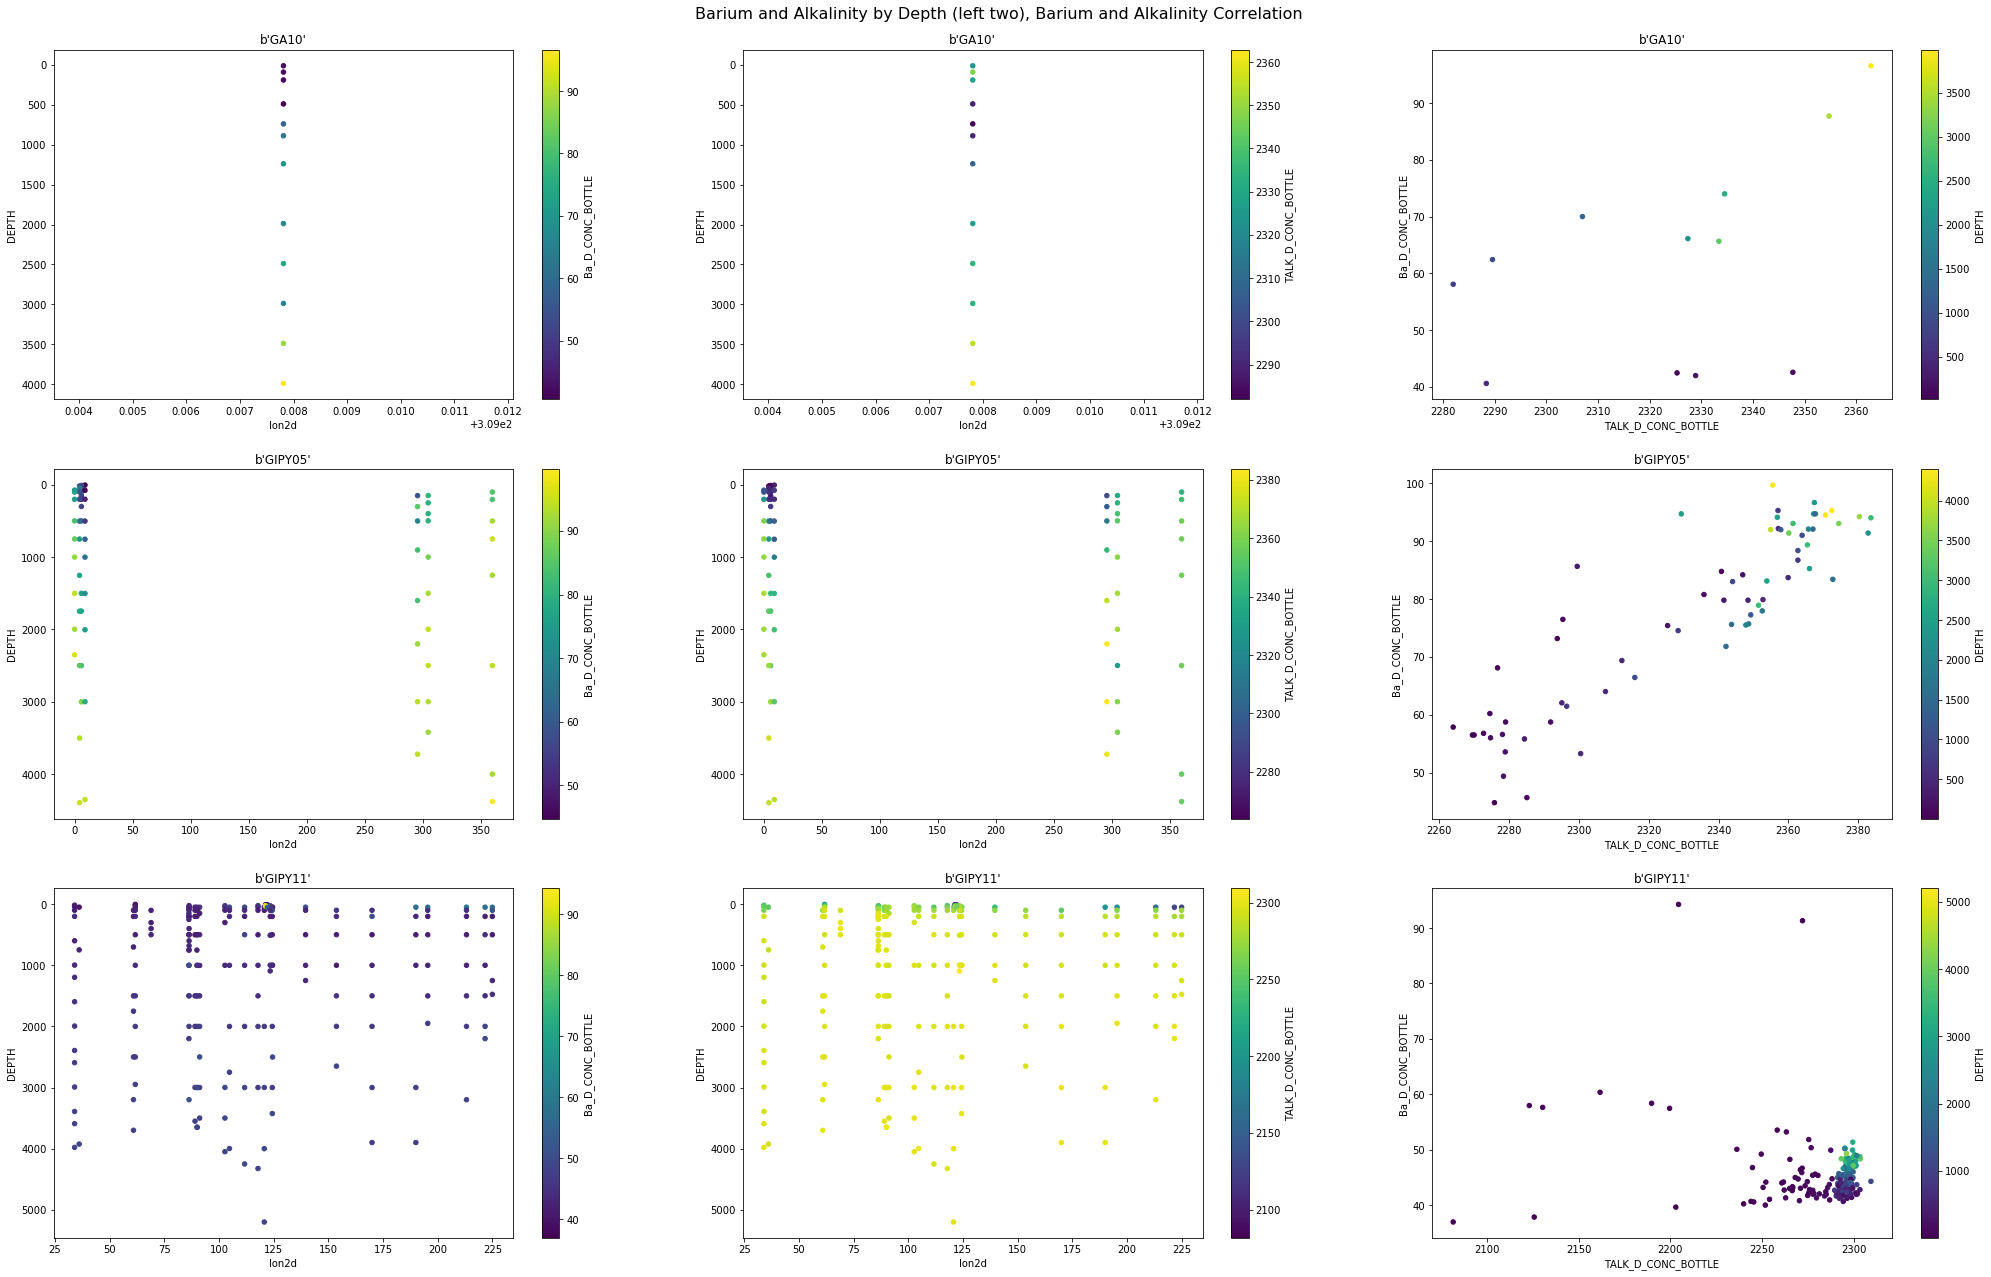

In [24]:
fig, ax = plt.subplots(figsize = (35,20), ncols= 3, nrows= len(by_transect.Cruise))


fig.suptitle('Barium and Alkalinity by Depth (left two), Barium and Alkalinity Correlation', size = 16)
fig.subplots_adjust(top=0.95)

i = 0

for transect, line in  by_transect:
    line.plot.scatter(y='DEPTH', x='lon2d', c='Ba_D_CONC_BOTTLE', cmap='viridis', title = transect, sharex=False, ax=ax[i,0])
    ax[i,0].invert_yaxis()
    line.plot.scatter(y='DEPTH', x='lon2d', c='TALK_D_CONC_BOTTLE', cmap='viridis', title = transect, sharex=False, ax=ax[i,1])
    ax[i,1].invert_yaxis()
    line.plot.scatter(x='TALK_D_CONC_BOTTLE', y='Ba_D_CONC_BOTTLE', cmap='viridis', c='DEPTH', title = transect, sharex=False, ax=ax[i,2])
    i += 1

From these plots we can see that the vertical trends of Barium Alkalinity follow a much more similar pattern than Barium and Salinity. Both exhibit more depleted values at the surface and increase in concentration at depth. 

Unfortunately there were not as many transect with both Barium and Alkalinity data as there were for Salinity and Barium. Nonetheless, we do see one good example of a positive correlation between Barium and Alkalinity (transect GIPY05) and what could potentially be a positive correlation (if there were more measurements) at transect GA10.

Sparse data makes it difficult to determine trends and correlations in the ocean. GEOTRACES uses Ocean Data Viewer to interpolate over the gaps of the data and produce graphs much like the one shown below (a pasted picture from their eGEOTRACES website).

These are visually more appealing, but may not be entirely accurate of the water column dynamics and relationships between components in seawater.

# If contoured, the plots above should show something similar to the GEOTRACES depth transect plots below...

![geotraces](https://www.egeotraces.org/sections/jpg/100dpi/GA03_w_Ba_D_CONC.jpg)

# Let's see how Barium, Salinity, and Alkalinity look Globally in the Ocean...

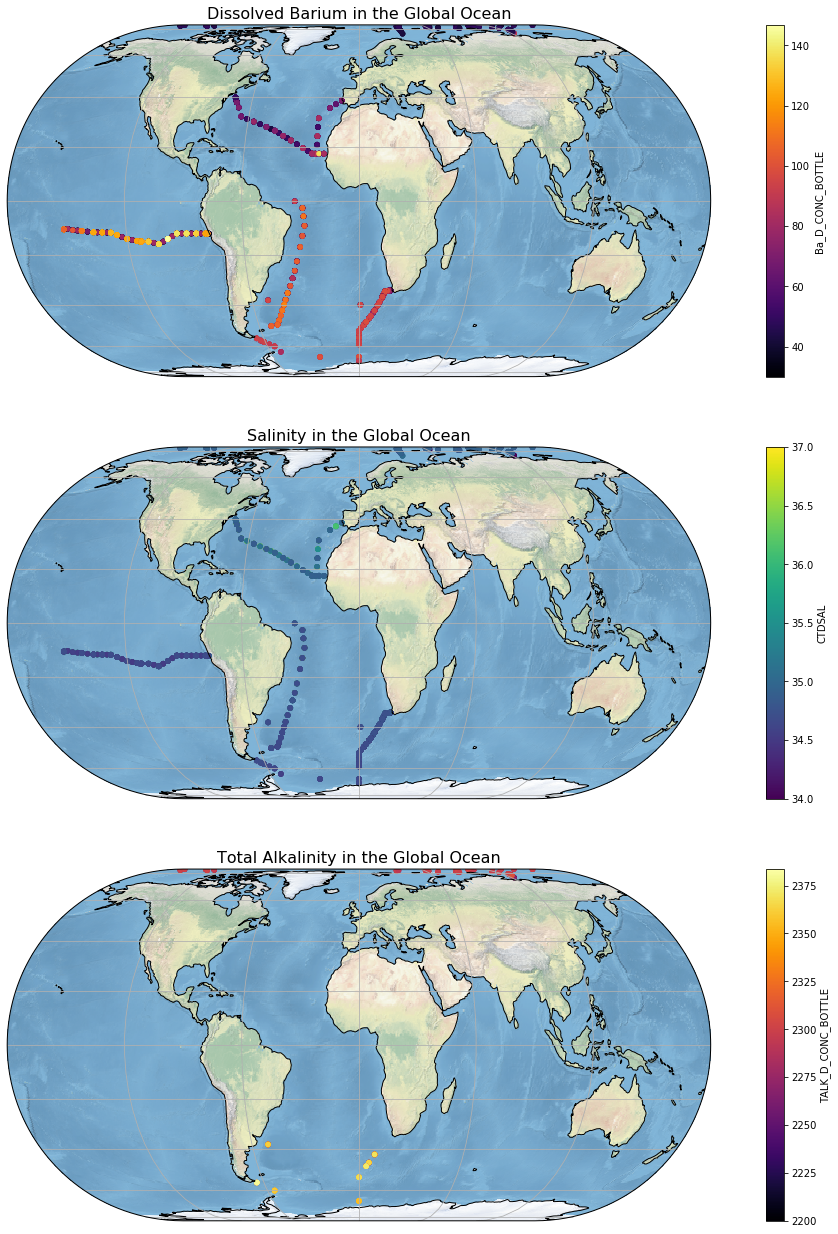

In [68]:

fig = plt.figure(figsize = (20,22))


ax1 = fig.add_subplot(311, projection=ccrs.EckertIV())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines()
ax1.set_title('Dissolved Barium in the Global Ocean', size = 16)
df_drop.plot.scatter('Longitude','Latitude', c = 'Ba_D_CONC_BOTTLE', ax=ax1, transform=ccrs.PlateCarree(), colormap = 'inferno', vmin=30)



ax2 = fig.add_subplot(312, projection=ccrs.EckertIV())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines()
ax2.set_title('Salinity in the Global Ocean', size = 16)
df_drop.plot.scatter('Longitude','Latitude', c = 'CTDSAL', ax=ax2, 
                   transform=ccrs.PlateCarree(), colormap = 'viridis', 
                   vmin = 34, vmax = 37)

ax3 = fig.add_subplot(313, projection=ccrs.EckertIV())
ax3.stock_img()
ax3.coastlines()
ax3.gridlines()
ax3.set_title('Total Alkalinity in the Global Ocean', size = 16)
drop.plot.scatter('Longitude','Latitude', c = 'TALK_D_CONC_BOTTLE', ax=ax3, transform=ccrs.PlateCarree(), colormap = 'inferno', vmin = 2200)


Barium appears to show a wider range of values than salinity throughout the ocean but this observation may change if we look at each basin on its own since there are many more Salinity measurements than there are Barium measurements

# Next let's Subset Data by Depth and Ocean basin 

to look at surface ocean Salinity and Barium values and how they vary across the ocean basins

Use longitude and latitude extents of each ocean basin to create masked subsets of the larger datasets

In [26]:
# Northern Atl lat expanse
natl_latmin = 0 
natl_latmax = 68.6387

# Southern Atl lat expanse
satl_latmin = -76.13
satl_latmax = -0.54

# Pacific ocean expanse
pac_latmin = -50.33
pac_latmax = 18.23
pac_lonmin = 100
pac_lonmax = 280

depth_mask = (df_drop['DEPTH'] >= 0) & (df_drop['DEPTH'] <= 1000)
surf_oc = df_drop.where(depth_mask == True)
#print(surf_oc)

#dataset with Salinity
N_Atl_lat = (df_drop['Latitude'] >= natl_latmin) & (df_drop['Latitude'] <= natl_latmax) 
N_Atl = df_drop.where(N_Atl_lat == True)
#print(N_Atl)

#dataset with Alk
alkN_Atl_lat = (drop['Latitude'] >= natl_latmin) & (drop['Latitude'] <= natl_latmax) 
N_Atl_alk = drop.where(N_Atl_lat == True)

#With Salinity
S_Atl_lat = (df_drop['Latitude'] >= satl_latmin) & (df_drop['Latitude'] <= satl_latmax)
S_Atl = df_drop.where(S_Atl_lat == True)
#print(S_Atl)

#With AlK
alkS_Atl_lat = (drop['Latitude'] >= satl_latmin) & (drop['Latitude'] <= satl_latmax)
S_Atl_alk = drop.where(S_Atl_lat == True)

#With Salinity
Pac_lon = ((df_drop['Longitude'] >= pac_lonmin) & (df_drop['Longitude'] <= pac_lonmax) & (df_drop['Latitude'] >= pac_latmin) & (df_drop['Latitude'] <= pac_latmax))
Pac = df_drop.where(Pac_lon == True)
#print(Pac)

#With Alk
alkPac_lon = ((drop['Longitude'] >= pac_lonmin) & (drop['Longitude'] <= pac_lonmax) & (drop['Latitude'] >= pac_latmin) & (drop['Latitude'] <= pac_latmax))
Pac_alk = drop.where(Pac_lon == True)

# Correlation between Salinity & Barium by Ocean Basin
using the masks established in the cell above

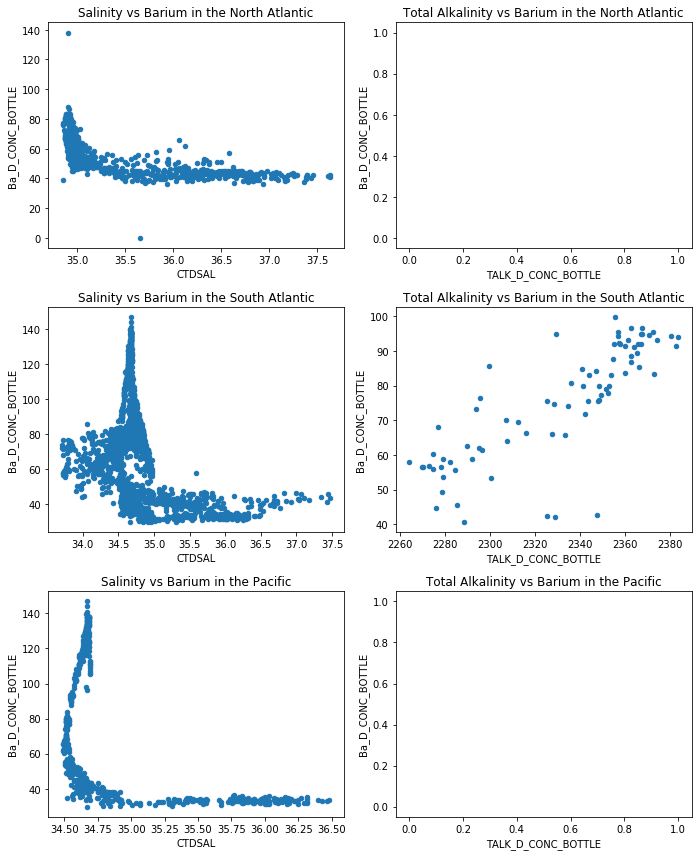

In [27]:
fig, ax = plt.subplots(figsize = (10,12), ncols= 2, nrows= 3)


N_Atl.plot.scatter('CTDSAL','Ba_D_CONC_BOTTLE', title = 'Salinity vs Barium in the North Atlantic',  ax=ax[0,0])
S_Atl.plot.scatter('CTDSAL','Ba_D_CONC_BOTTLE', title = 'Salinity vs Barium in the South Atlantic', ax=ax[1,0])
Pac.plot.scatter('CTDSAL','Ba_D_CONC_BOTTLE', title = 'Salinity vs Barium in the Pacific', ax=ax[2,0])

N_Atl_alk.plot.scatter('TALK_D_CONC_BOTTLE','Ba_D_CONC_BOTTLE', title = 'Total Alkalinity vs Barium in the North Atlantic',  ax=ax[0,1])
S_Atl_alk.plot.scatter('TALK_D_CONC_BOTTLE','Ba_D_CONC_BOTTLE', title = 'Total Alkalinity vs Barium in the South Atlantic', ax=ax[1,1])
Pac_alk.plot.scatter('TALK_D_CONC_BOTTLE','Ba_D_CONC_BOTTLE', title = 'Total Alkalinity vs Barium in the Pacific', ax=ax[2,1])

plt.tight_layout()

No positive correlations are present for Ba vs Salinity. Total Alkalinity measurements were limited to the Southern Atlantic so their correlation with Barium by ocean basin could not be compared for each basin. In the Southern Atlantic however, it does look like Barium and Total Alkalinity are positively correlated. 


# Plot correlations between salinity and barium per ocean basin (N. Atl,  S.O., and Pac.) & Cartopy distribution maps of Salinity / Barium values
Here each basin is shown in order to get a higher resolution view of the gradients of Barium, Salinity, and Alkalinity (where available) within each subset of the ocean

# Plots for the North Atlantic 

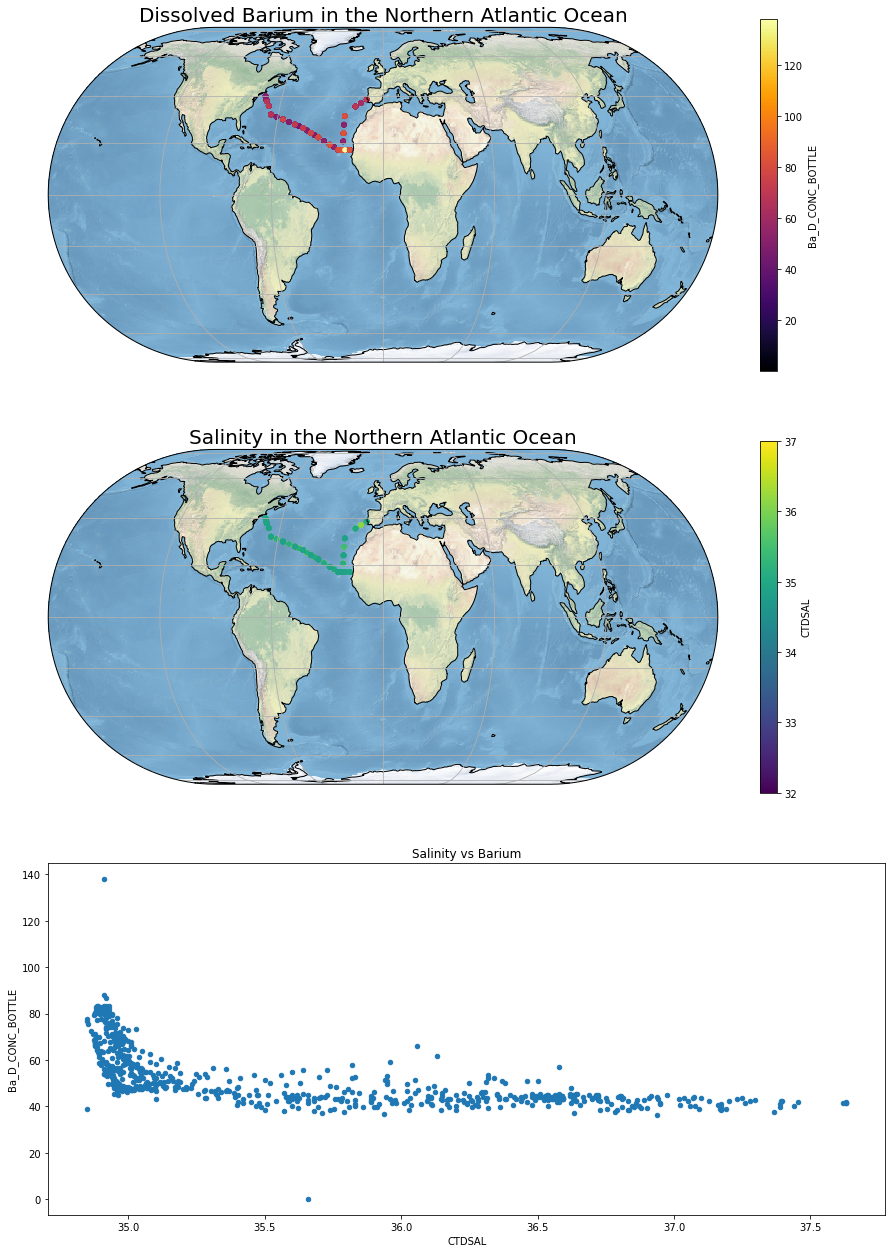

In [70]:
fig = plt.figure(figsize = (15,22))


ax1 = fig.add_subplot(311, projection=ccrs.EckertIV())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines()
ax1.set_title('Dissolved Barium in the Northern Atlantic Ocean', size = 20)
N_Atl.plot.scatter('Longitude','Latitude', c = 'Ba_D_CONC_BOTTLE', ax=ax1, transform=ccrs.PlateCarree(), colormap = 'inferno')

ax2 = fig.add_subplot(312, projection=ccrs.EckertIV())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines()
ax2.set_title('Salinity in the Northern Atlantic Ocean', size = 20)
N_Atl.plot.scatter('Longitude','Latitude', c = 'CTDSAL', ax=ax2, transform=ccrs.PlateCarree(), colormap = 'viridis', vmin = 32, vmax = 37)

ax3 = fig.add_subplot(313)
N_Atl.plot.scatter('CTDSAL','Ba_D_CONC_BOTTLE', title = 'Salinity vs Barium', ax = ax3)



# Plots for the Southern Atlantic & Pacific 
we'll also include a cartopy map of alkalinity here since this is where we have transects for this variable 

In [ ]:
fig = plt.figure(figsize = (10,28))


ax1 = fig.add_subplot(511, projection=ccrs.EckertIV())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines()
ax1.set_title('Dissolved Barium in the Southern Atlantic Ocean', size = 20)
S_Atl.plot.scatter('Longitude','Latitude', c = 'Ba_D_CONC_BOTTLE', ax=ax1, transform=ccrs.PlateCarree(), colormap = 'inferno')

ax2 = fig.add_subplot(512, projection=ccrs.EckertIV())
ax2.stock_img()
ax2.coastlines()
ax2.gridlines()
ax2.set_title('Salinity in the Southern Atlantic Ocean', size = 20)
S_Atl.plot.scatter('Longitude','Latitude', c = 'CTDSAL', ax=ax2, transform=ccrs.PlateCarree(), colormap = 'viridis', vmin = 32, vmax = 37)

ax3 = fig.add_subplot(513, projection=ccrs.EckertIV())
ax3.stock_img()
ax3.coastlines()
ax3.gridlines()
ax3.set_title('Alkalinity in the Southern Atlantic Ocean', size = 20)
S_Atl_alk.plot.scatter('Longitude','Latitude', c = 'TALK_D_CONC_BOTTLE', ax=ax3, transform=ccrs.PlateCarree(), colormap = 'viridis', vmin = 32, vmax = 37)

ax4 = fig.add_subplot(514)
S_Atl.plot.scatter('CTDSAL','Ba_D_CONC_BOTTLE', title = 'Salinity vs Barium', ax = ax4)

ax5 = fig.add_subplot(515)
S_Atl_alk.plot.scatter('TALK_D_CONC_BOTTLE','Ba_D_CONC_BOTTLE', title = 'Alkalinity vs Barium', ax = ax5)



Though the basin-speicifc cartopy plots reveal greater variation in values, they do not suggest anything new about the correlations between Barium, Salinity and Alkalinity.
Barium and Alkalinity in the Southern Hemisphere still show a positive correlation which is notable. The literature notes that this trend is due to both Barium and Alkalinity being depleted at the surface and regenerating at depth. Though the trend exists, barium and alkalinity are not tied by a direct, shared mechanism.